# Project 2

## Data source loctaion

From  WEB imported as EXCEL 
https://healthdata.gov/dataset/United-States-COVID-19-Cases-and-Deaths-by-State-o/hiyb-zgc2

The dataset I chose is about the CDC's daily online posting of COVID-19 case and death numbers. Data Precision The Centers for Disease Control and Prevention (CDC) tracks COVID-19 illnesses, hospitalizations, and deaths to identify trends, detect outbreaks, and assess the effectiveness of public health initiatives.

## Data is free to download?
Yes

## Data is legal to access?
Yes

## Documented EDA is not available for the data?
Documented EDA-not avilable.
## Size of data
60060 rows, 15columns, and size of 4.85MB.


# Hypotheses:
### 1.The highest death rate in Maryland
### False

### 2.The conf_cases are high in Washington when compared to all other states
### True

### 3.New York has the highest new_death cases compared to all other state
### True

### 4.August has the highest number of covid cases
### True

### 5.Total positive cases have not increased by more than 70%
### True


In [25]:
# importing all required packages
import pandas as p                  
import matplotlib.pyplot as plt     
import numpy as np                    
import seaborn as sb                 
import datetime         
import plotly.graph_objects as g


In [26]:
df=p.read_csv(r"C:\Users\lahar\Downloads\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED (2).csv")#To read CSV file
df.head(6) #This function displays the first six rows of the dataframe

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree


In [27]:
#total number of null values in each column
null_counts=df.isnull().sum()
print(null_counts)

submission_date        0
state                  0
tot_cases              0
conf_cases         26026
prob_cases         26098
new_case               0
pnew_case           3526
tot_death              0
conf_death         26787
prob_death         26787
new_death              0
pnew_death          3494
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64


In [28]:
# null percents for each column
null_percents = null_counts / len(df)
print(null_percents)


submission_date    0.000000
state              0.000000
tot_cases          0.000000
conf_cases         0.433333
prob_cases         0.434532
new_case           0.000000
pnew_case          0.058708
tot_death          0.000000
conf_death         0.446004
prob_death         0.446004
new_death          0.000000
pnew_death         0.058175
created_at         0.000000
consent_cases      0.166750
consent_deaths     0.150000
dtype: float64


# Data cleaning

In [29]:
df1=df.drop(columns=['consent_cases','consent_deaths'])#columns are being removed


In [30]:
df1.shape  #getting the shape of dataframe

(60060, 13)

In [31]:
df2=df1.fillna(df1.mean(numeric_only=True)) #replacing null with mean value in that 

In [32]:
df2.isnull().sum()

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
dtype: int64

# Hypotheses:

## 1. The highest death rates in marryland
## False

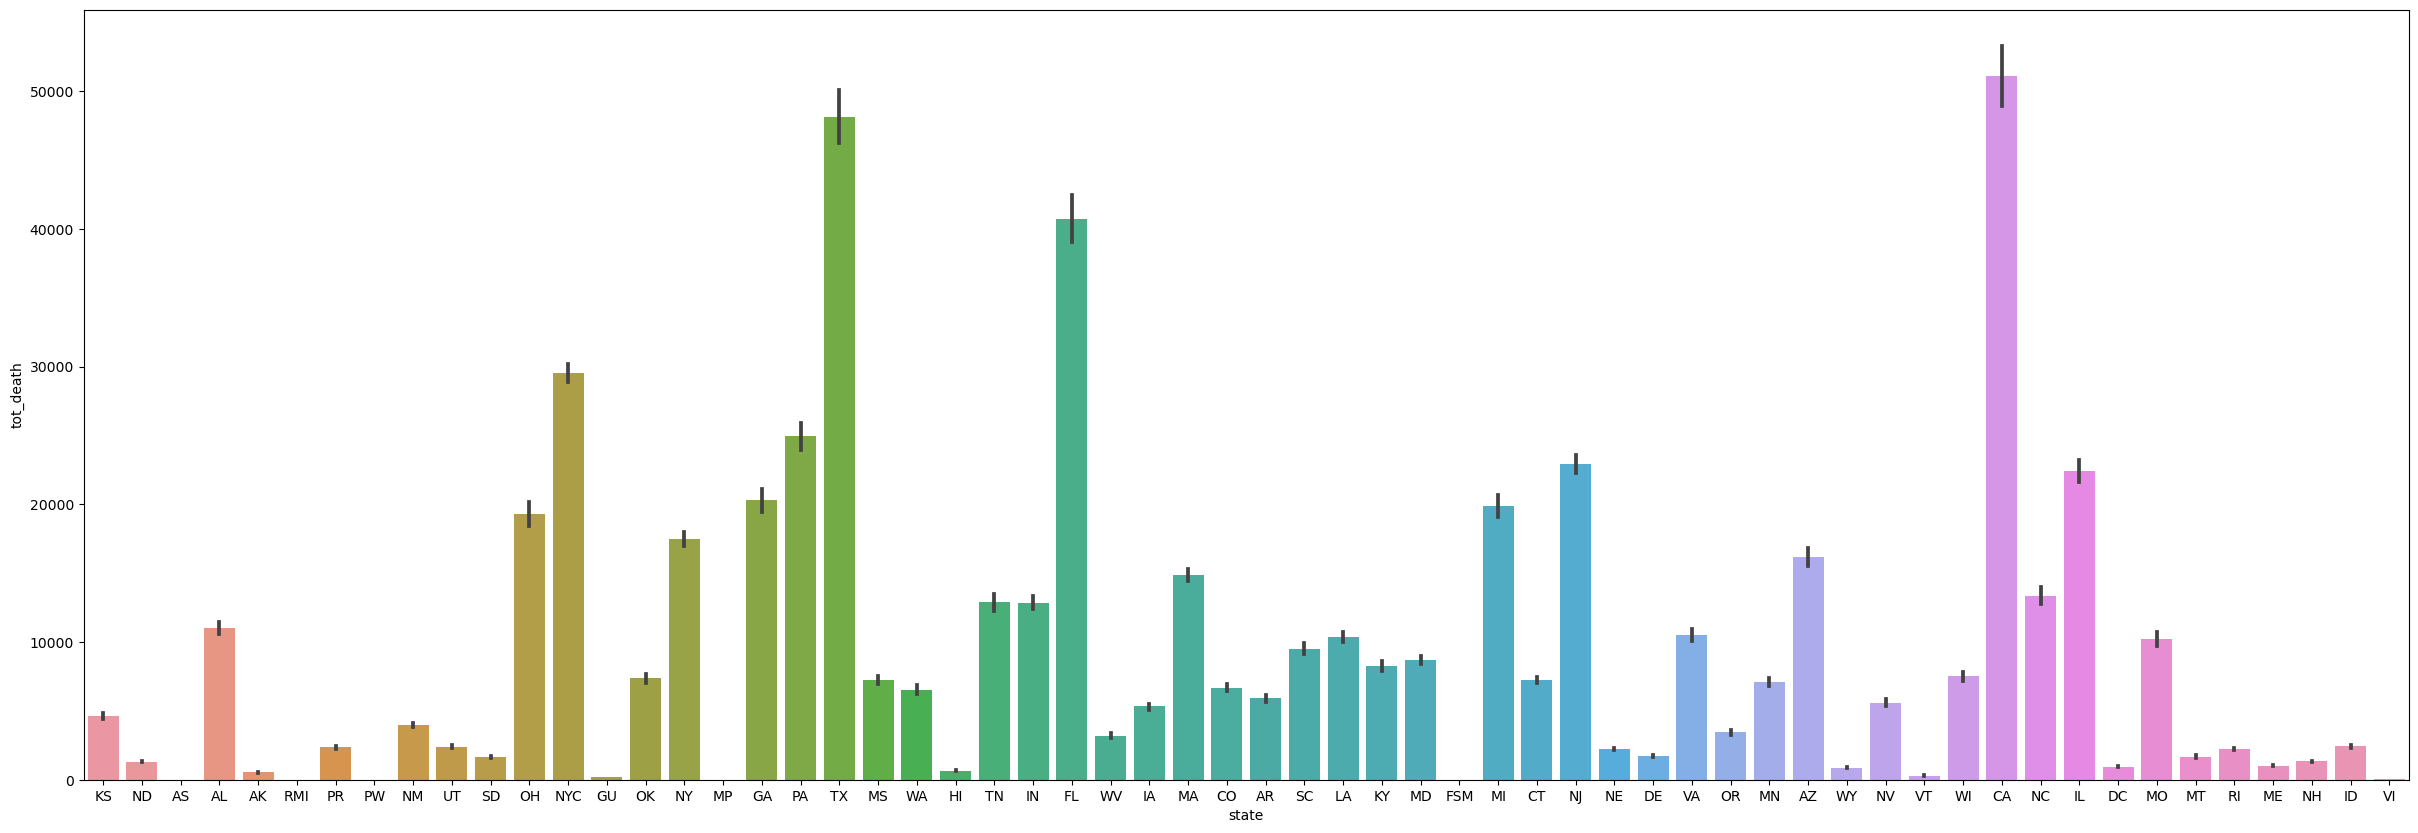

In [33]:
# graph of state vs death cases in each state 
plt.figure(figsize=(30,10))
s = sb.barplot(x = "state", y = "tot_death", data=df2)


## False, (california(CA) has the highest number of death rate not maryland)

## 2.The conf_cases are high in Washington when compared to all other states 
## True

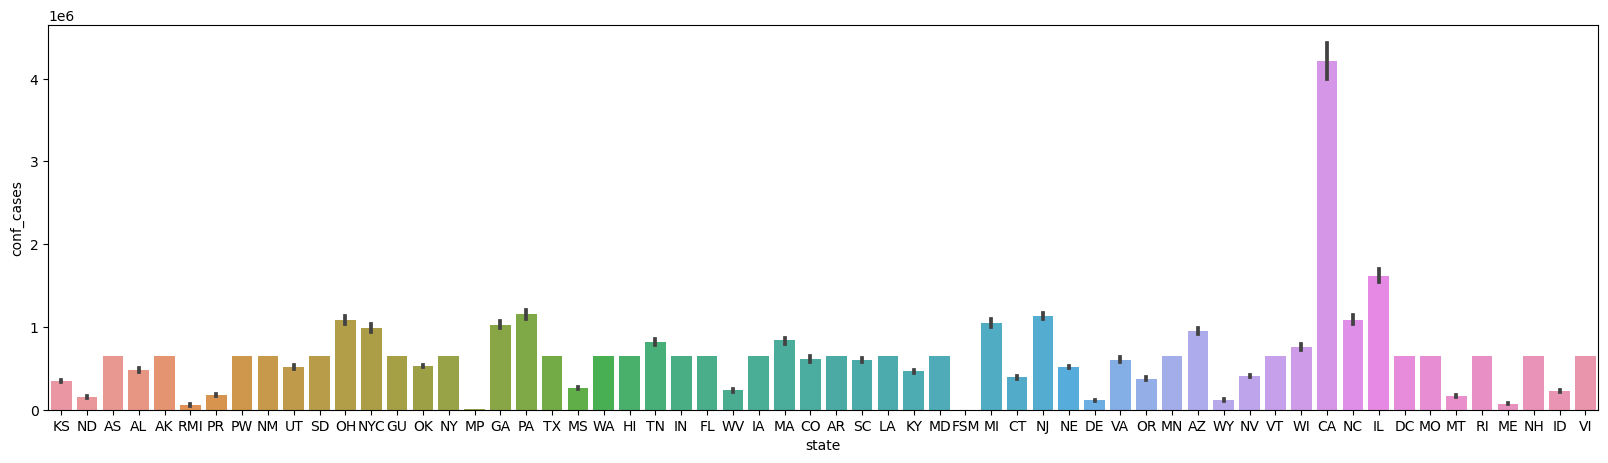

In [34]:
# graph of state vs conf_cases in each state
plt.figure(figsize=(20,5))
s = sb.barplot(x = "state", y = "conf_cases", data=df2)


## False 
## California has the highest number of conf_cases not Washington

## 3.New York has the highest new_death cases compared to all other state
## True

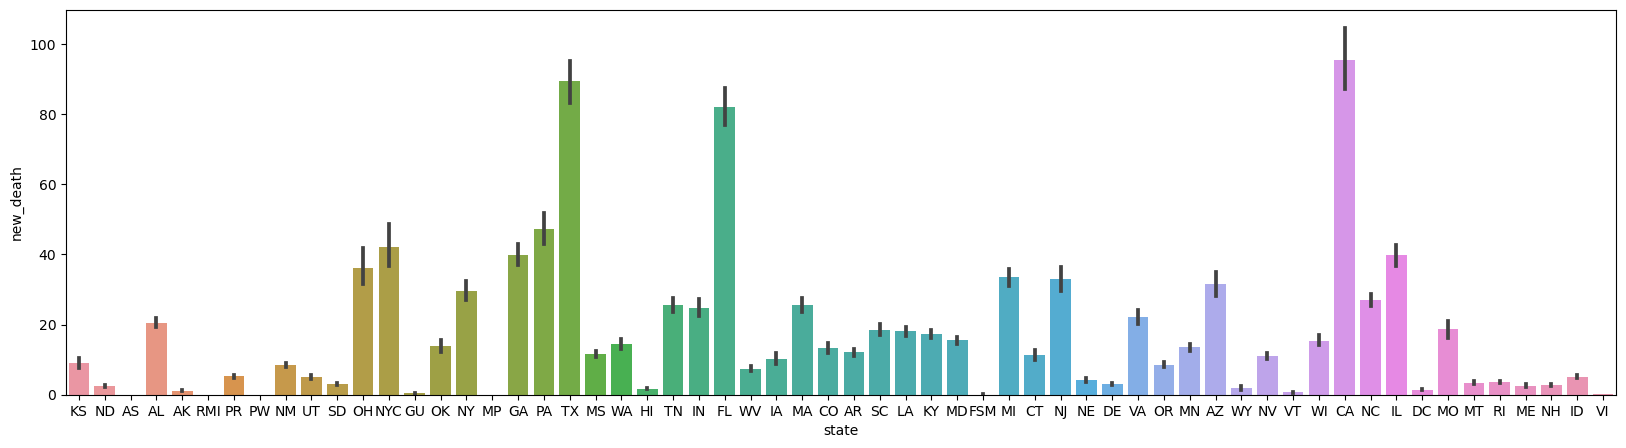

In [35]:
# graph of state vs new_death in each state
plt.figure(figsize=(20,5))
s = sb.barplot(x = "state", y = "new_death", data=df2)


## false
## California has highest number of new_death case not New York

## 4.August has the highest number of covid cases
## True

<AxesSubplot:xlabel='month_from_submission', ylabel='tot_cases'>

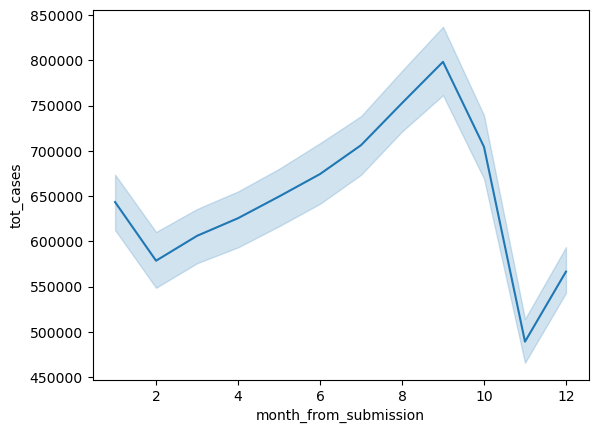

In [36]:
#graph of month vs total number of cases
df2['submission_date'] = p.to_datetime(df2['submission_date'],format='%m/%d/%Y') #fetching month from submission date
df2['month_from_submission'] = p.DatetimeIndex(df2['submission_date']).month
df2.groupby(["state","month_from_submission"])
sb.lineplot(data=df2, x="month_from_submission", y="tot_cases")

## False september has highest number of covid cases

## 5.Total positive cases have not increased by more than 70%
### True

In [37]:
#In piechart visualisation, We compare number of cases versus number conf_cases

sum_column = df2.sum(numeric_only=True)
colors = ['rgb(255, 0, 255)', 'rgb(0, 255, 255)']  # Set custom colors
fig = g.Figure(data=[g.Pie(labels=['tot_cases', 'conf_cases'], values=sum_column,marker=dict(colors=colors))])
fig.show()

## True 50.2% is tot_cases is lessthan 70% 